In [1]:
import torch 
import torch.nn as nn
import numpy as np
import torch.optim as optim

Generating sample data

In [2]:
rng = np.random.default_rng(42)
torch.manual_seed(42)

In [3]:
def make_blobs(n_per_class=100, centers=((-1.5, -1.0), (1.5, 1.0)), std=0.5, seed=None):
    r = np.random.default_rng(seed)
    c0, c1 = np.array(centers[0]), np.array(centers[1])
    x0 = r.normal(loc=c0, scale=std, size=(n_per_class, 2))
    x1 = r.normal(loc=c1, scale=std, size=(n_per_class, 2))
    X = np.vstack([x0, x1]).astype(np.float32)   # shape (200, 2)
    y = np.hstack([np.zeros(n_per_class), np.ones(n_per_class)]).astype(np.float32)  # shape (200,)
    return X, y

In [4]:
x_train, y_train = make_blobs(n_per_class=100, std=0.45, seed=1)
x_test,  y_test  = make_blobs(n_per_class=100, std=0.45, seed=2)

In [5]:
x_train

array([[-1.3444871 , -0.63027185],
       [-1.3513033 , -1.5864208 ],
       [-1.0925899 , -0.79913145],
       [-1.741629  , -0.73849684],
       [-1.3359424 , -0.8676404 ],
       [-1.48721   , -0.75397915],
       [-1.8314043 , -1.0733094 ],
       [-1.7169536 , -0.7305192 ],
       [-1.482125  , -1.1316055 ],
       [-1.8518589 , -1.1157365 ],
       [-1.496336  , -1.1240213 ],
       [-0.91767126, -0.54697406],
       [-2.7200232 , -1.8500559 ],
       [-1.5786475 , -1.1899856 ],
       [-1.4038607 , -0.9022051 ],
       [-0.5469726 , -1.5004094 ],
       [-1.6699222 , -0.08075278],
       [-1.2089837 , -0.7016215 ],
       [-1.7313029 , -1.7416338 ],
       [-1.4246409 , -0.95094365],
       [-2.0523083 , -1.307452  ],
       [-1.5324197 , -1.4251382 ],
       [-1.5442215 , -0.9570326 ],
       [-1.4839861 , -1.2278312 ],
       [-1.2328134 , -0.5989749 ],
       [-1.3556182 , -1.3682036 ],
       [-1.1707565 , -1.225648  ],
       [-1.1043777 , -1.4823043 ],
       [-1.0884898 ,

In [6]:
y_train

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)

In [7]:
x_test.shape

(200, 2)

In [8]:
y_train.shape

(200,)

In [9]:
x_test.shape

(200, 2)

In [10]:
y_test.shape

(200,)

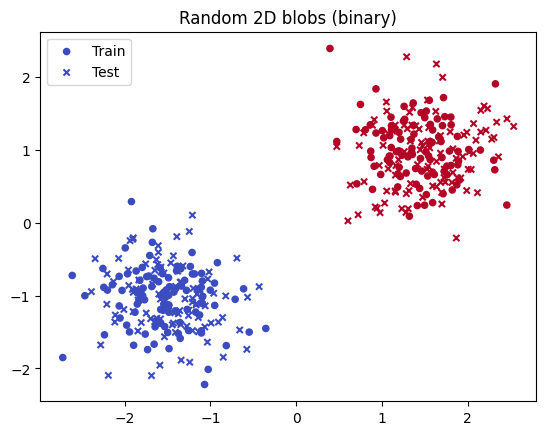

In [11]:
import matplotlib.pyplot as plt


plt.scatter(x_train[:,0], x_train[:,1], c=y_train, s=20, cmap="coolwarm", label="Train")
plt.scatter(x_test[:,0],  x_test[:,1],  c=y_test,  s=20, cmap="coolwarm", marker="x", label="Test")
plt.legend()
plt.title("Random 2D blobs (binary)")
plt.show()

In [12]:
class RegModel(nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.sequential = nn.Sequential(
            nn.Linear(num_features, 64),
            nn.ReLU(),
            nn.Linear(64,64),
            nn.ReLU(),
            nn.Linear(64,1)
        )
        
    def forward(self, x):
        x = self.sequential(x)
        return x
    
    

In [24]:

x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1,1 )

x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1,1)


In [25]:
x_train_tensor.shape

torch.Size([200, 2])

In [26]:
model = RegModel(num_features=x_train_tensor.shape[1])
optimizer = optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

In [27]:
epochs = 500

In [28]:
def train_model(model, optimizer, loss_fn, x_train_tensor, y_train_tensor,
                x_test_tensor, y_test_tensor, epochs=500, eval_interval=50):
    for epoch in range(epochs):
        model.train()

        predictions = model(x_train_tensor)
        loss = loss_fn(predictions, y_train_tensor)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % eval_interval == 0:
            model.eval()
            with torch.no_grad():
                test_preds = model(x_test_tensor)
                test_loss = loss_fn(test_preds, y_test_tensor)
            print(f"Epoch {epoch}: Train Loss = {loss.item():.4f}, Test Loss = {test_loss.item():.4f}")
    
    return model 


In [29]:
# Make sure labels are long for CrossEntropyLoss
y_train_tensor_cls = torch.tensor(y_train.astype(int), dtype=torch.long)
y_test_tensor_cls = torch.tensor(y_test.astype(int), dtype=torch.long)


trained_model = train_model(model, optimizer, loss_fn, x_train_tensor, y_train_tensor,
            x_test_tensor, y_test_tensor, epochs=500, eval_interval=50 )

Epoch 0: Train Loss = 0.7121, Test Loss = 0.6400
Epoch 50: Train Loss = 0.0040, Test Loss = 0.0065
Epoch 100: Train Loss = 0.0001, Test Loss = 0.0002
Epoch 150: Train Loss = 0.0000, Test Loss = 0.0002
Epoch 200: Train Loss = 0.0000, Test Loss = 0.0002
Epoch 250: Train Loss = 0.0000, Test Loss = 0.0001
Epoch 300: Train Loss = 0.0000, Test Loss = 0.0001
Epoch 350: Train Loss = 0.0000, Test Loss = 0.0001
Epoch 400: Train Loss = 0.0000, Test Loss = 0.0001
Epoch 450: Train Loss = 0.0000, Test Loss = 0.0001


In [ ]:
# model is completely overfitted 

In [ ]:
# using dropouts 

In [ ]:
class RegModel(nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.sequential = nn.Sequential(
            nn.Linear(num_features, 64),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(64,64),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(64,1)
        )
        
    def forward(self, x):
        x = self.sequential(x)
        return x
    
    